# Results

## Reduced iron content, IRE binding activity, and transferrin receptor expression in the failing human heart

In [1]:
from math import ceil
import pandas as pd
from orkg import ORKG
from scipy.stats import ttest_ind

orkg = ORKG(host='https://orkg.org/orkg')
orkg.templates.materialize_templates(['R12002', 'R12006', 'R12008'])
tp = orkg.templates

df = pd.read_csv('data.csv') 
tt = ttest_ind(df['non-failing heart (NF)'], 
               df['failing heart (F)'], 
               equal_var=False, nan_policy='omit')
pvalue = tt.pvalue
pvalue_ceil = ceil(pvalue * 1000) / 1000.0

tp.students_ttest(
  'Statistically significant hypothesis test with IRE binding dependent variable on failing and non-failing hearts (p<{})'.format(pvalue_ceil),
  'http://purl.obolibrary.org/obo/GO_0030350', # the study design dependent variable
  tp.pvalue('the p-value of the statistical hypothesis test (p<{})'.format(pvalue_ceil), tp.scalar_value_specification(pvalue)),
  'data.csv', # the input dataset
).serialize_to_file('article.contribution.1.json', as_jsonld=True)

Installing dependencies: 100%|████████████████████| 3/3 [00:01<00:00,  1.78it/s]


Consistent with previous reports (@bib1; @bib2) iron concentration was significantly lower in LV tissue samples from patients with advanced heart failure than in LV tissue samples from unused donor hearts. As shown by electrophoretic mobility shift assays, IRE binding activity was significantly (p<0.001) reduced in failing hearts (most pronounced in patients with ischemic cardiomyopathy) ([Figure 1](#fig1)). Protein expression levels of the transferrin receptor were significantly lower in failing hearts than in the controls.

<AxesSubplot:>

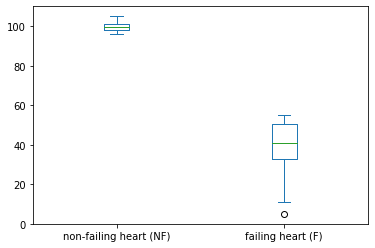

In [2]:
df.plot.box()